___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [106]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [107]:
df.head()

,IPN31152N
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 1972-01-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  604 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


In [109]:
df.columns = ['Production']

In [110]:
df.head()

,Production
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032


<AxesSubplot:xlabel='DATE'>

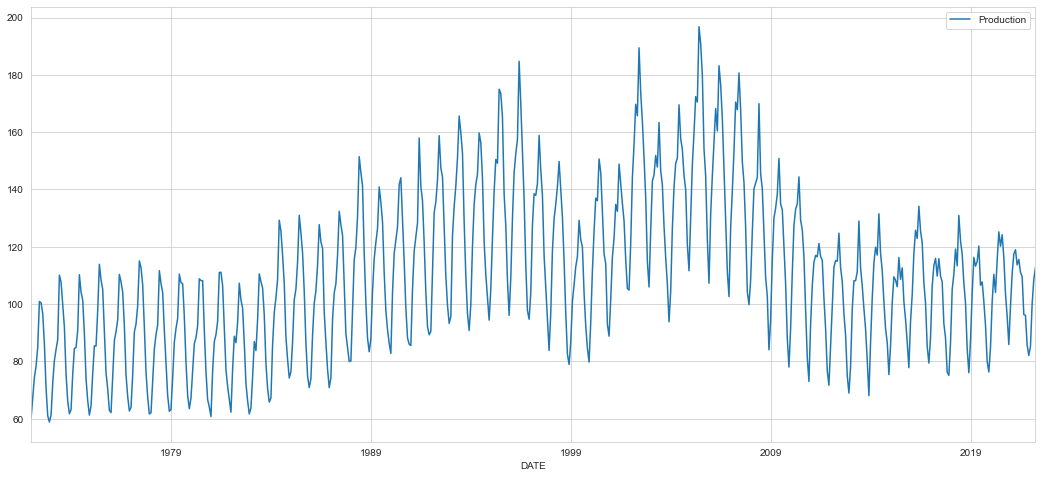

In [111]:
df.plot(figsize=(18,8))

# Preprocessing of Data

## Train Test Split

In [112]:
test_size = 36

In [113]:
test_ind = len(df)- test_size

In [114]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

## Scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [118]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [119]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [120]:
X, y = generator[0]

In [121]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00946792 0.06107946 0.11324473 0.14143469 0.18979772 0.30491313
 0.30149792 0.274119   0.19733843 0.08531424 0.01561414 0.        ]
Predict this y: 
 [[0.01773922]]


# Modelling & Model Performance

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
n_features = train_scaled.shape[1]

## with "tanh" activation function

In [124]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 12, 64)            16896     
                                                                 
 lstm_19 (LSTM)              (None, 12, 32)            12416     
                                                                 
 lstm_20 (LSTM)              (None, 16)                3136      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [126]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [127]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
556/556 [==============================] - 59s 47ms/step - loss: 0.0260 - val_loss: 0.0096
Epoch 2/20
556/556 [==============================] - 18s 32ms/step - loss: 0.0105 - val_loss: 0.0072
Epoch 3/20
556/556 [==============================] - 19s 34ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 4/20
556/556 [==============================] - 19s 33ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 5/20
556/556 [==============================] - 18s 33ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 6/20
556/556 [==============================] - 19s 34ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 7/20
556/556 [==============================] - 20s 37ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 8/20
556/556 [==============================] - 18s 33ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/20
556/556 [==============================] - 17s 30ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 10/20
556/556 [==============================] - 17s 30ms/step - loss: 0.003

<AxesSubplot:>

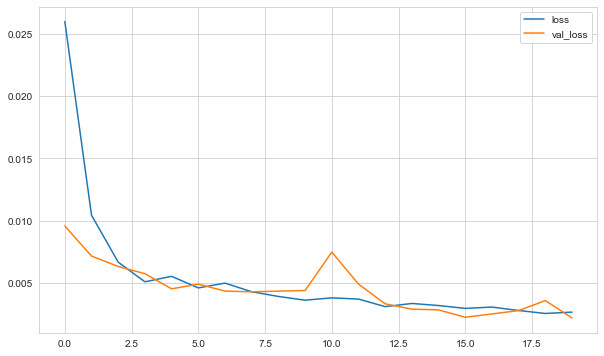

In [128]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [131]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 71ms/step


### Inverse Transformation and Comparing

In [132]:
predictions = scaler.inverse_transform(predictions_scaled)

In [133]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2019-05-01,114.852,124.040
2019-06-01,120.249,130.581
2019-07-01,106.617,130.868
2019-08-01,107.721,125.869
2019-09-01,100.954,116.217
2019-10-01,92.592,104.426
2019-11-01,79.977,93.445
2019-12-01,76.305,87.735
2020-01-01,84.888,89.746


<AxesSubplot:xlabel='DATE'>

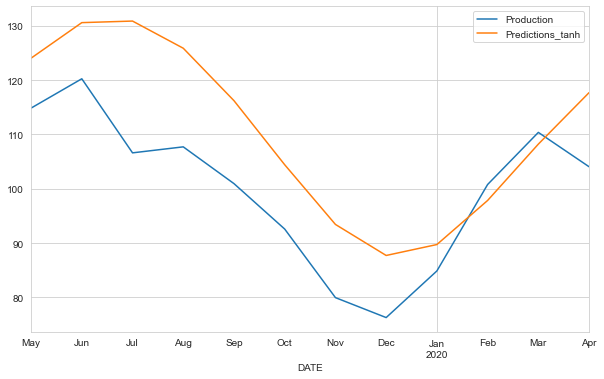

In [134]:
compare.plot()

In [135]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.04218795082364779 
mae: 11.458559388492008 
mse: 168.04640319911772 
rmse: 12.963271315494316


## with "relu" activation function

In [136]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [137]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 64)            16896     
                                                                 
 lstm_22 (LSTM)              (None, 12, 32)            12416     
                                                                 
 lstm_23 (LSTM)              (None, 16)                3136      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [138]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [139]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
556/556 [==============================] - 31s 28ms/step - loss: 0.0311 - val_loss: 0.0383
Epoch 2/20
556/556 [==============================] - 14s 25ms/step - loss: 0.0184 - val_loss: 0.0060
Epoch 3/20
556/556 [==============================] - 14s 25ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 4/20
556/556 [==============================] - 13s 24ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 5/20
556/556 [==============================] - 13s 24ms/step - loss: 0.0076 - val_loss: 0.0087
Epoch 6/20
556/556 [==============================] - 13s 24ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 7/20
556/556 [==============================] - 10s 18ms/step - loss: 0.0066 - val_loss: 0.0078


<AxesSubplot:>

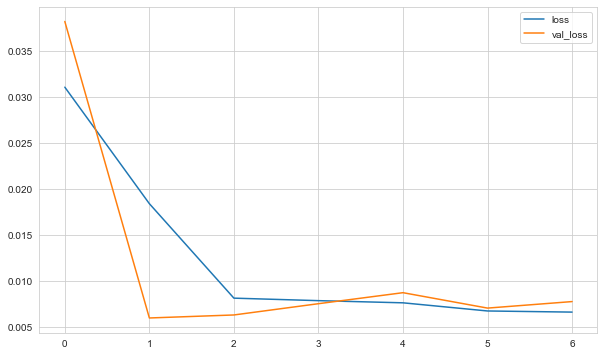

In [140]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [141]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 49ms/step


### Inverse Transformation and Comparing

In [142]:
predictions = scaler.inverse_transform(predictions_scaled)

In [143]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2019-05-01,114.852,124.040,121.985
2019-06-01,120.249,130.581,125.752
2019-07-01,106.617,130.868,120.797
2019-08-01,107.721,125.869,115.105
2019-09-01,100.954,116.217,107.901
2019-10-01,92.592,104.426,101.812
2019-11-01,79.977,93.445,89.928
2019-12-01,76.305,87.735,88.090
2020-01-01,84.888,89.746,99.237


<AxesSubplot:xlabel='DATE'>

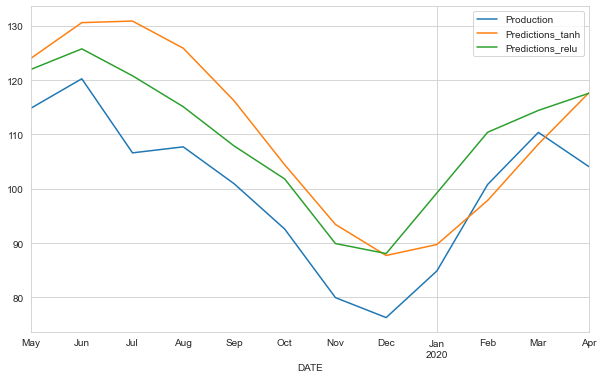

In [144]:
compare.plot()

In [145]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.4273040891764248 
mae: 9.470159764478105 
mse: 100.47846863432481 
rmse: 10.023894883443502


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [146]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [147]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [148]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
592/592 [==============================] - 19s 17ms/step - loss: 0.0268
Epoch 2/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0103
Epoch 3/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0084
Epoch 4/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0079
Epoch 5/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0064
Epoch 6/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0069
Epoch 7/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0071
Epoch 8/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0066
Epoch 9/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0063
Epoch 10/10
592/592 [==============================] - 10s 17ms/step - loss: 0.0061


In [149]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 50ms/step


In [150]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[110.12953166],
       [111.14339278],
       [109.34521096],
       [106.67681993],
       [ 96.61306098],
       [ 93.90267965],
       [ 83.87768731],
       [ 83.00024328],
       [ 86.71682329],
       [ 97.88182037],
       [104.76649949],
       [107.10868851]])

In [151]:
df

,Production
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032
...,...
2021-12-01,82.090
2022-01-01,85.276
2022-02-01,100.132


In [152]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [153]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,110.130
2019-11-01,111.143
2019-12-01,109.345
2020-01-01,106.677
2020-02-01,96.613
2020-03-01,93.903
2020-04-01,83.878
2020-05-01,83.000
2020-06-01,86.717
2020-07-01,97.882


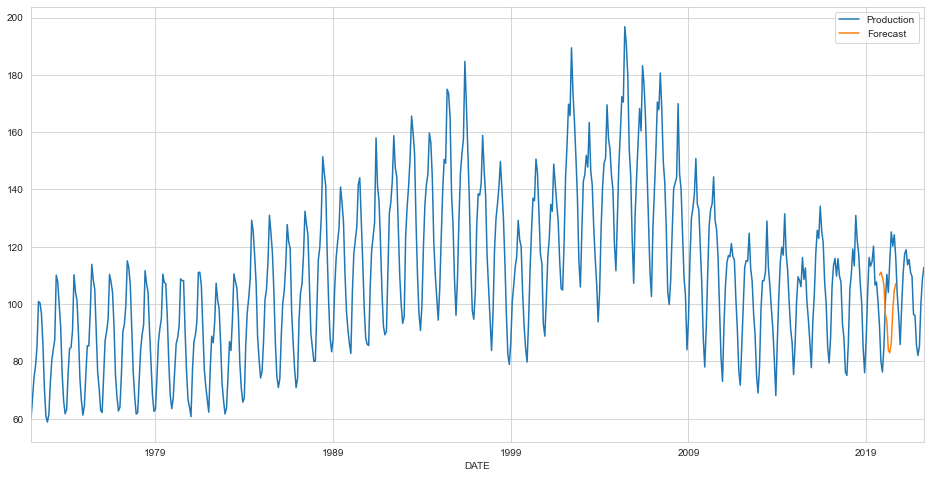

In [154]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

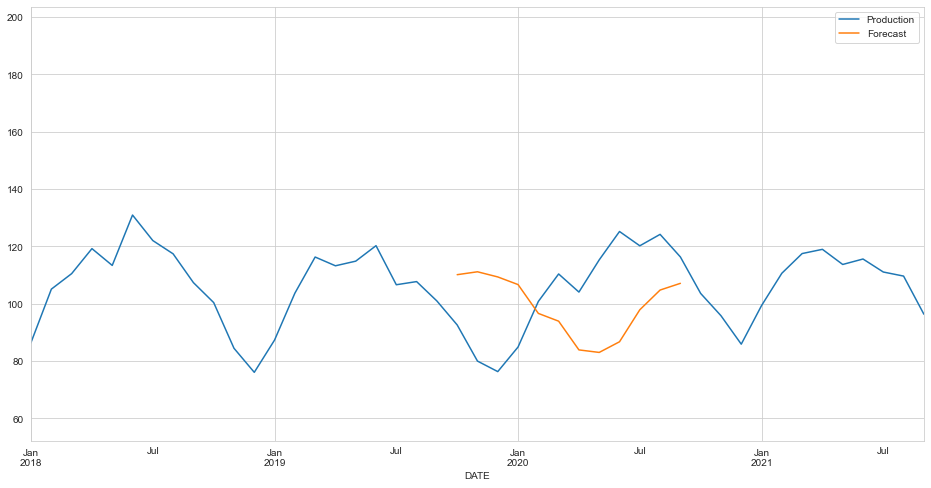

In [155]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___